In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import numpy as np
import pandas as pd
import random
from random import randrange

In [ ]:
#define some parametes related to specific training problem
batch_size = 64
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 32, 32

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("CIFAR10 dataset has been imported")

CIFAR10 dataset has been imported


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=1)
print("Validation Set has been created")

Validation Set has been created


In [ ]:
classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [ ]:
print("We have: ", x_train.shape[0], " TRAINING paradigms of size: ", x_train.shape, "\n")
print("We have: ", x_val.shape[0], " VALIDATION paradigms of size: ", x_val.shape, "\n")
print("We have: ", x_test.shape[0], " TESTING paradigms of size: ", x_test.shape, "\n")

We have:  42500  TRAINING paradigms of size:  (42500, 32, 32, 3) 

We have:  7500  VALIDATION paradigms of size:  (7500, 32, 32, 3) 

We have:  10000  TESTING paradigms of size:  (10000, 32, 32, 3) 



In [ ]:
print("Training Set: Νumber of elements for each class")
unique_train, counts_train = np.unique(y_train, return_counts=True)
print(dict(zip(unique_train, counts_train)), "\n")

print("Validation Set: Νumber of elements for each class")
unique_val, counts_val = np.unique(y_val, return_counts=True)
print(dict(zip(unique_val, counts_val)), "\n")

print("Testing Set: Νumber of elements for each class")
unique_test, counts_test = np.unique(y_test, return_counts=True)
print(dict(zip(unique_test, counts_test)), "\n")

Training Set: Νumber of elements for each class
{0: 4239, 1: 4272, 2: 4236, 3: 4269, 4: 4229, 5: 4248, 6: 4255, 7: 4266, 8: 4261, 9: 4225} 

Validation Set: Νumber of elements for each class
{0: 761, 1: 728, 2: 764, 3: 731, 4: 771, 5: 752, 6: 745, 7: 734, 8: 739, 9: 775} 

Testing Set: Νumber of elements for each class
{0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000} 



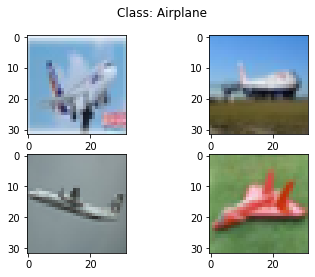

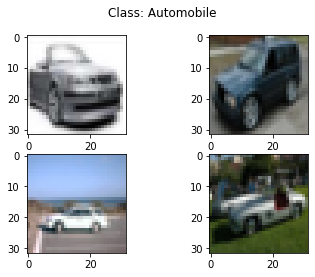

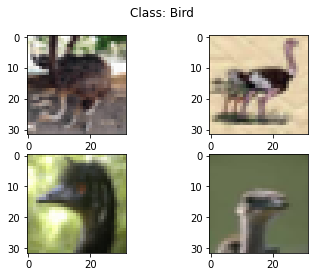

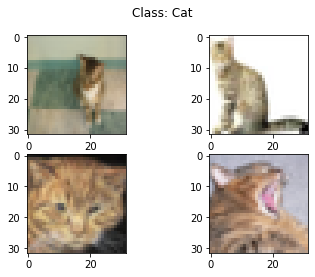

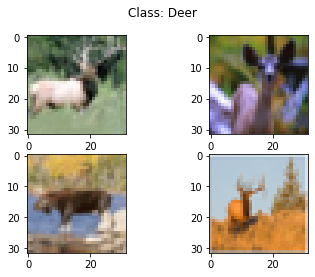

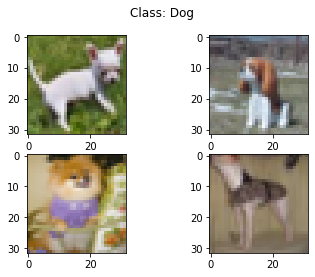

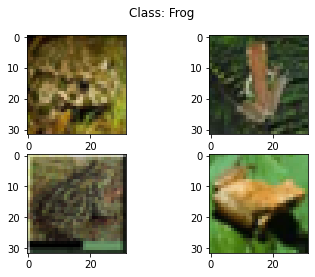

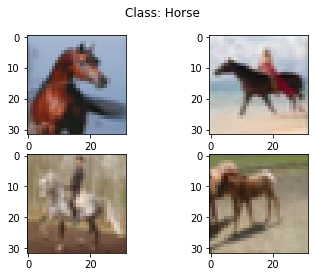

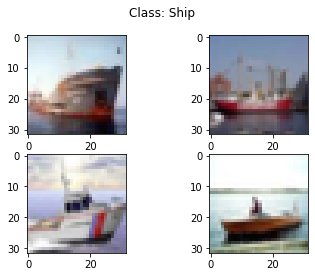

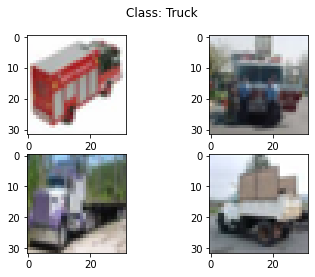

In [ ]:
#plot randomly 4 images for each class

class_to_demonstrate = 0
while (sum(y_train == class_to_demonstrate) > 4):
    tmp_idxs_to_use = np.where(y_train == class_to_demonstrate)

    # create new plot window
    plt.figure()

    # plot 4 random images
    plt.subplot(221)
    plt.imshow(x_train[tmp_idxs_to_use[0][randrange(counts_train[class_to_demonstrate])], :, :, :])
    plt.subplot(222)
    plt.imshow(x_train[tmp_idxs_to_use[0][randrange(counts_train[class_to_demonstrate])], :, :, :])
    plt.subplot(223)
    plt.imshow(x_train[tmp_idxs_to_use[0][randrange(counts_train[class_to_demonstrate])], :, :, :])
    plt.subplot(224)
    plt.imshow(x_train[tmp_idxs_to_use[0][randrange(counts_train[class_to_demonstrate])], :, :, :])
    tmp_title = 'Class: ' + str(classes[class_to_demonstrate])
    plt.suptitle(tmp_title)

    # show the plot
    plt.show()
    plt.pause(2)

    # update the class to demonstrate index
    class_to_demonstrate = class_to_demonstrate + 1

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# here we define the model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
#do not forget to compile the structure here
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
print("CNN model has been compiled. Proceeding to fitting.")

CNN model has been compiled. Proceeding to fitting.


In [ ]:
# print model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 29, 29, 64)        3136      
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 64)        65600     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 10, 128)       131200    
                                                                 
 conv2d_19 (Conv2D)          (None, 7, 7, 128)         262272    
                                                      

In [ ]:
# fit model parameters, given a set of training data
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10
665/665 [==============================] - 357s 535ms/step - loss: 1.8872 - accuracy: 0.3644 - val_loss: 1.4136 - val_accuracy: 0.4952
Epoch 2/10
665/665 [==============================] - 360s 542ms/step - loss: 1.3853 - accuracy: 0.5010 - val_loss: 1.2975 - val_accuracy: 0.5385
Epoch 3/10
665/665 [==============================] - 357s 537ms/step - loss: 1.2182 - accuracy: 0.5689 - val_loss: 1.1687 - val_accuracy: 0.5937
Epoch 4/10
665/665 [==============================] - 354s 532ms/step - loss: 1.0736 - accuracy: 0.6213 - val_loss: 1.0419 - val_accuracy: 0.6345
Epoch 5/10
665/665 [==============================] - 353s 530ms/step - loss: 0.9655 - accuracy: 0.6587 - val_loss: 0.9693 - val_accuracy: 0.6568
Epoch 6/10
665/665 [==============================] - 354s 533ms/step - loss: 0.8670 - accuracy: 0.6982 - val_loss: 0.9651 - val_accuracy: 0.6661
Epoch 7/10
665/665 [==============================] - 360s 541ms/step - loss: 0.8134 - accuracy: 0.7113 - val_loss: 0.9162 -

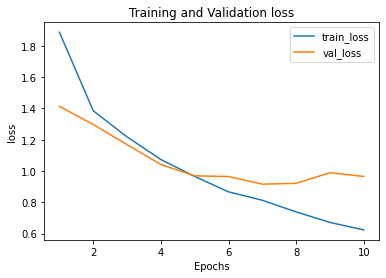

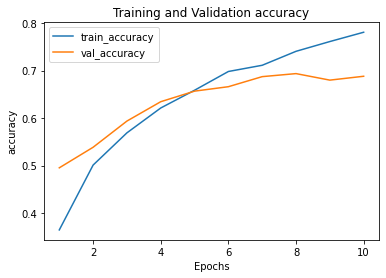

In [ ]:
#plot train-val loss & accuracy for epochs

def plot_metric(history, metric):
      train_metrics = history.history[metric]
      val_metrics = history.history['val_'+metric]
      epochs = range(1, len(train_metrics) + 1)
      plt.plot(epochs, train_metrics)
      plt.plot(epochs, val_metrics)
      plt.title('Training and Validation '+ metric)
      plt.xlabel("Epochs")
      plt.ylabel(metric)
      plt.legend(["train_"+metric, 'val_'+metric])
      plt.show()

plot_metric(history, 'loss')
plot_metric(history, 'accuracy')

In [ ]:
# saving the trained model
model_name = 'CIFAR-10_CNN.h5'
model.save(model_name)

In [ ]:
# loading a trained model & use it over test data
loaded_model = keras.models.load_model(model_name)
print("Model was loaded successfully")

Model was loaded successfully


In [ ]:
# calculate some common performance scores
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.978219747543335
Test accuracy: 0.6850000023841858


In [ ]:
y_test_predictions_vectorized = loaded_model.predict(x_test)
y_test_predictions = np.argmax(y_test_predictions_vectorized, axis=1)
print("Model prediction was finished successfully")

313/313 [==============================] - 20s 64ms/step
Model prediction was finished successfully


In [ ]:
y_test_argmax = np.argmax(y_test, axis=1)

In [ ]:
print("Classification Report: \n", classification_report(y_test_argmax, y_test_predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.69      0.71      1000
           1       0.84      0.81      0.83      1000
           2       0.56      0.58      0.57      1000
           3       0.49      0.50      0.49      1000
           4       0.57      0.71      0.63      1000
           5       0.68      0.46      0.55      1000
           6       0.65      0.85      0.74      1000
           7       0.82      0.69      0.75      1000
           8       0.77      0.82      0.79      1000
           9       0.83      0.74      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.69      0.68     10000



In [ ]:
print("Confusion Matrix: \n", confusion_matrix(y_test_argmax, y_test_predictions))

Confusion Matrix: 
 [[690  17 102  21  30   2  14   9  86  29]
 [ 16 814   8  10   9   3  19   1  67  53]
 [ 45   1 578  71 133  41  92  20  14   5]
 [ 18   6  97 496 107  90 124  27  15  20]
 [ 20   4  58  51 712  17  91  34  10   3]
 [  8   2  63 252  85 462  66  52   5   5]
 [  4   1  56  35  41   8 846   4   2   3]
 [ 10   2  47  47 117  49  19 693   3  13]
 [ 79  14  15  19   8   2  15   2 821  25]
 [ 47 108   6  16  14   2  14   8  47 738]]


In [ ]:
print("Predictions: Νumber of elements for each class")
unique_test_pred, counts_test_pred = np.unique(y_test_predictions, return_counts=True)
print(dict(zip(unique_test_pred, counts_test_pred)), "\n")

Predictions: Νumber of elements for each class
{0: 937, 1: 969, 2: 1030, 3: 1018, 4: 1256, 5: 676, 6: 1300, 7: 850, 8: 1070, 9: 894} 



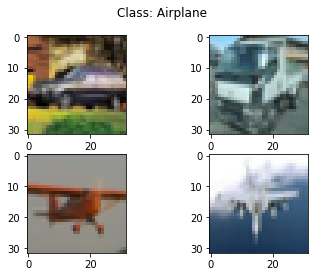

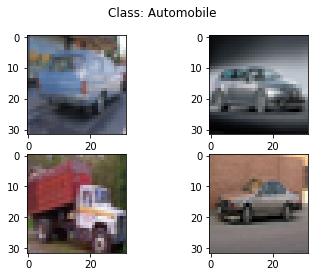

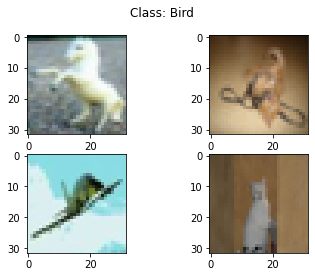

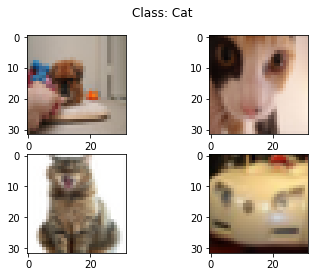

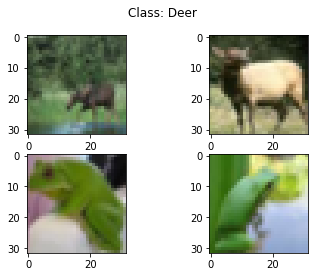

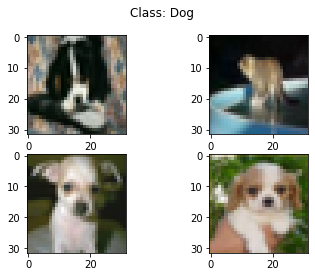

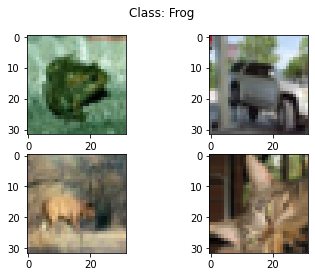

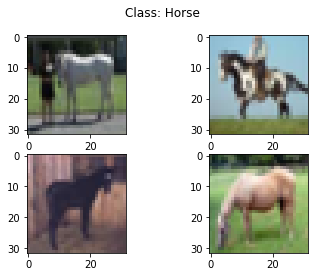

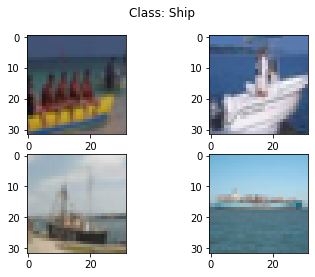

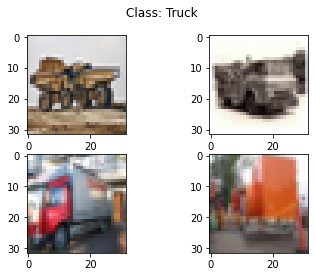

In [ ]:
#plot randomly 4 images for each prediction class

class_to_demonstrate = 0
while (sum(y_test_predictions == class_to_demonstrate) > 4):
    tmp_idxs_to_use = np.where(y_test_predictions == class_to_demonstrate)

    # create new plot window
    plt.figure()

    # plot 4 random images
    plt.subplot(221)
    plt.imshow(x_test[tmp_idxs_to_use[0][randrange(counts_test_pred[class_to_demonstrate])], :, :, :])
    plt.subplot(222)
    plt.imshow(x_test[tmp_idxs_to_use[0][randrange(counts_test_pred[class_to_demonstrate])], :, :, :])
    plt.subplot(223)
    plt.imshow(x_test[tmp_idxs_to_use[0][randrange(counts_test_pred[class_to_demonstrate])], :, :, :])
    plt.subplot(224)
    plt.imshow(x_test[tmp_idxs_to_use[0][randrange(counts_test_pred[class_to_demonstrate])], :, :, :])
    tmp_title = 'Class: ' + str(classes[class_to_demonstrate])
    plt.suptitle(tmp_title)

    # show the plot
    plt.show()
    plt.pause(2)

    # update the class to demonstrate index
    class_to_demonstrate = class_to_demonstrate + 1
